In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
feature = [
    "duration",
    "protocol_type",
    "service",
    "flag",
    "src_bytes",
    "dst_bytes",
    "land",
    "wrong_fragment",
    "urgent",
    "hot",
    "num_failed_logins",
    "logged_in",
    "num_compromised",
    "root_shell",
    "su_attempted",
    "num_root",
    "num_file_creations",
    "num_shells",
    "num_access_files",
    "num_outbound_cmds",
    "is_host_login",
    "is_guest_login",
    "count",
    "srv_count",
    "serror_rate",
    "srv_serror_rate",
    "rerror_rate",
    "srv_rerror_rate",
    "same_srv_rate",
    "diff_srv_rate",
    "srv_diff_host_rate",
    "dst_host_count",
    "dst_host_srv_count",
    "dst_host_same_srv_rate",
    "dst_host_diff_srv_rate",
    "dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate",
    "dst_host_serror_rate",
    "dst_host_srv_serror_rate",
    "dst_host_rerror_rate",
    "dst_host_srv_rerror_rate",
    "label", "difficulty"]

train = "./data/nsl-kdd/KDDTrain+.txt"
train_data = pd.read_csv(train, names=feature)
train_data.drop(["difficulty"], axis=1, inplace=True)

test = "./data/nsl-kdd/KDDTest+.txt"
test_data = pd.read_csv(test, names=feature)
test_data.drop(["difficulty"], axis=1, inplace=True)

print('Dimensions of the Training set:',train_data.shape)
print('Dimensions of the Test set:',test_data.shape)

Dimensions of the Training set: (125973, 42)
Dimensions of the Test set: (22544, 42)


In [5]:
s = ["normal", "back", "land", "neptune", "pod", "smurf", "teardrop", "mailbomb", "processtable", "udpstorm",
     "apache2", "worm"]
train_data = train_data.loc[train_data["label"].isin(s)]
test_data = test_data.loc[test_data["label"].isin(s)]

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113270 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     113270 non-null  int64  
 1   protocol_type                113270 non-null  object 
 2   service                      113270 non-null  object 
 3   flag                         113270 non-null  object 
 4   src_bytes                    113270 non-null  int64  
 5   dst_bytes                    113270 non-null  int64  
 6   land                         113270 non-null  int64  
 7   wrong_fragment               113270 non-null  int64  
 8   urgent                       113270 non-null  int64  
 9   hot                          113270 non-null  int64  
 10  num_failed_logins            113270 non-null  int64  
 11  logged_in                    113270 non-null  int64  
 12  num_compromised              113270 non-null  int64  
 13  root

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17171 entries, 0 to 22542
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     17171 non-null  int64  
 1   protocol_type                17171 non-null  object 
 2   service                      17171 non-null  object 
 3   flag                         17171 non-null  object 
 4   src_bytes                    17171 non-null  int64  
 5   dst_bytes                    17171 non-null  int64  
 6   land                         17171 non-null  int64  
 7   wrong_fragment               17171 non-null  int64  
 8   urgent                       17171 non-null  int64  
 9   hot                          17171 non-null  int64  
 10  num_failed_logins            17171 non-null  int64  
 11  logged_in                    17171 non-null  int64  
 12  num_compromised              17171 non-null  int64  
 13  root_shell           

In [11]:
print('Label distribution Training set:')
print(train_data['label'].value_counts())
print()
print('Label distribution Test set:')
print(test_data['label'].value_counts())

Label distribution Training set:
label
normal      67343
neptune     41214
smurf        2646
back          956
teardrop      892
pod           201
land           18
Name: count, dtype: int64

Label distribution Test set:
label
normal          9711
neptune         4657
apache2          737
processtable     685
smurf            665
back             359
mailbomb         293
pod               41
teardrop          12
land               7
worm               2
udpstorm           2
Name: count, dtype: int64


In [13]:
missing_columns= [col for col in train_data.columns if train_data[col].isnull().sum() > 0]
print(f"Number of missing columns: {missing_columns} ")
print(f"Number of duplicate rows: {train_data.duplicated().sum()}")

Number of missing columns: [] 
Number of duplicate rows: 0


In [15]:
missing_columns= [col for col in test_data.columns if test_data[col].isnull().sum() > 0]
print(f"Number of missing columns: {missing_columns} ")
print(f"Number of duplicate rows: {test_data.duplicated().sum()}")

Number of missing columns: [] 
Number of duplicate rows: 0


In [17]:
train_data["label"] = train_data["label"].apply(lambda x: "normal" if x == "normal" else "anomalous")
test_data["label"] = test_data["label"].apply(lambda x: "normal" if x == "normal" else "anomalous")

<Axes: xlabel='label', ylabel='count'>

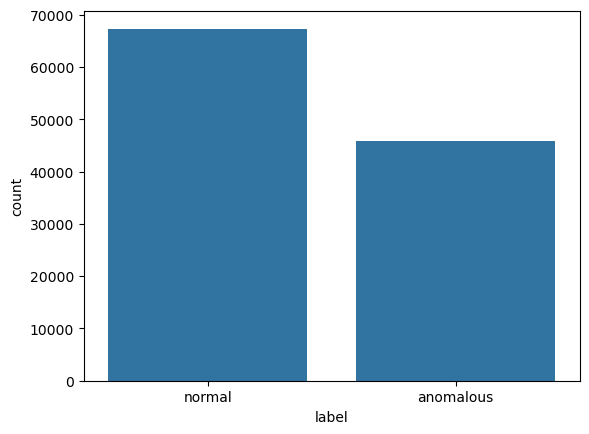

In [19]:
sns.countplot(x='label',data=train_data)

<Axes: xlabel='label', ylabel='count'>

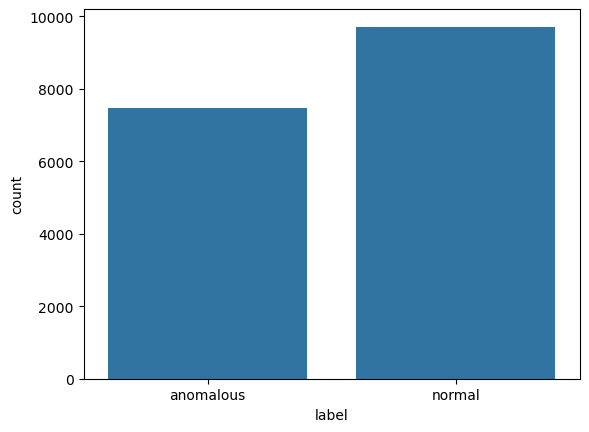

In [21]:
sns.countplot(x='label',data=test_data)

In [23]:
print('Train data set:')
for col_name in train_data.columns:
    if train_data[col_name].dtypes == 'object' :
        unique_cat = len(train_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print('Test data set:')
for col_name in test_data.columns:
    if test_data[col_name].dtypes == 'object' :
        unique_cat = len(test_data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Train data set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 65 categories
Feature 'flag' has 10 categories
Feature 'label' has 2 categories
Test data set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 63 categories
Feature 'flag' has 9 categories
Feature 'label' has 2 categories


In [25]:
from sklearn.preprocessing import LabelEncoder

def LabelEncoding(df_train, df_test):
    for col in df_train.columns:
        if df_train[col].dtype == 'object':
            label_encoder = LabelEncoder()
            # Huấn luyện LabelEncoder trên tập train
            df_train[col] = label_encoder.fit_transform(df_train[col])
            
            # Chuyển đổi tập test
            df_test[col] = df_test[col].apply(
                lambda x: label_encoder.transform([x])[0] if x in label_encoder.classes_ else -1  # Thay thế bằng -1 nếu không có
            )

            # Tạo từ điển giá trị gốc và giá trị mã hóa
            mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
            
            # In thông tin
            print(f"\nCột: {col}")
            for original, encoded in mapping.items():
                print(f"{original}: {encoded}")

LabelEncoding(train_data, test_data)


Cột: protocol_type
icmp: 0
tcp: 1
udp: 2

Cột: service
IRC: 0
X11: 1
Z39_50: 2
auth: 3
bgp: 4
courier: 5
csnet_ns: 6
ctf: 7
daytime: 8
discard: 9
domain: 10
domain_u: 11
echo: 12
eco_i: 13
ecr_i: 14
efs: 15
exec: 16
finger: 17
ftp: 18
ftp_data: 19
gopher: 20
hostnames: 21
http: 22
http_443: 23
imap4: 24
iso_tsap: 25
klogin: 26
kshell: 27
ldap: 28
link: 29
login: 30
mtp: 31
name: 32
netbios_dgm: 33
netbios_ns: 34
netbios_ssn: 35
netstat: 36
nnsp: 37
nntp: 38
ntp_u: 39
other: 40
pop_2: 41
pop_3: 42
printer: 43
private: 44
red_i: 45
remote_job: 46
rje: 47
shell: 48
smtp: 49
sql_net: 50
ssh: 51
sunrpc: 52
supdup: 53
systat: 54
telnet: 55
tftp_u: 56
tim_i: 57
time: 58
urh_i: 59
urp_i: 60
uucp: 61
uucp_path: 62
vmnet: 63
whois: 64

Cột: flag
OTH: 0
REJ: 1
RSTO: 2
RSTR: 3
S0: 4
S1: 5
S2: 6
S3: 7
SF: 8
SH: 9

Cột: label
anomalous: 0
normal: 1


In [27]:
train_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,19,8,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,40,8,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,44,4,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,8,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,8,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [29]:
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,44,1,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
1,0,1,44,1,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,0
2,2,1,19,8,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,1
5,0,1,22,8,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,1
6,0,1,49,8,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.0,0.72,0.04,1


In [31]:
print('Train label')
print(train_data['label'].value_counts())
print();
print('Test label')
print(test_data['label'].value_counts())

Train label
label
1    67343
0    45927
Name: count, dtype: int64

Test label
label
1    9711
0    7460
Name: count, dtype: int64


In [33]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113270 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     113270 non-null  int64  
 1   protocol_type                113270 non-null  int32  
 2   service                      113270 non-null  int32  
 3   flag                         113270 non-null  int32  
 4   src_bytes                    113270 non-null  int64  
 5   dst_bytes                    113270 non-null  int64  
 6   land                         113270 non-null  int64  
 7   wrong_fragment               113270 non-null  int64  
 8   urgent                       113270 non-null  int64  
 9   hot                          113270 non-null  int64  
 10  num_failed_logins            113270 non-null  int64  
 11  logged_in                    113270 non-null  int64  
 12  num_compromised              113270 non-null  int64  
 13  root

In [35]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17171 entries, 0 to 22542
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     17171 non-null  int64  
 1   protocol_type                17171 non-null  int32  
 2   service                      17171 non-null  int32  
 3   flag                         17171 non-null  int64  
 4   src_bytes                    17171 non-null  int64  
 5   dst_bytes                    17171 non-null  int64  
 6   land                         17171 non-null  int64  
 7   wrong_fragment               17171 non-null  int64  
 8   urgent                       17171 non-null  int64  
 9   hot                          17171 non-null  int64  
 10  num_failed_logins            17171 non-null  int64  
 11  logged_in                    17171 non-null  int64  
 12  num_compromised              17171 non-null  int64  
 13  root_shell           

In [37]:
train_data.to_csv('./data/nsl-kdd/Train_Data.csv', index=False)
test_data.to_csv('./data/nsl-kdd/Test_Data.csv', index=False)